# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #f5e2e2ff; color: #db81e3ff; padding: 12px; line-height: 0.7;">DATA </div></center>

In [2]:
import pandas as pd

df=pd.read_csv("Data_Regresi.csv")
df

,TIME,Promo(X1),Karyawan(X2),Jual(Y)
0,1,248,42,1705
1,2,210,35,1682
2,3,207,32,1663
3,4,153,33,1628
4,5,169,28,1650
5,6,195,28,1671
6,7,186,39,1661
7,8,188,42,1662
8,9,198,45,1671
9,10,195,33,1668


# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #ffffffff; color: #b17eadff; padding: 12px; line-height: 0.7;">MATPLOTLIB </div></center>

Index(['TIME', 'Promo(X1)', 'Karyawan(X2)', 'Jual(Y)'], dtype='object')


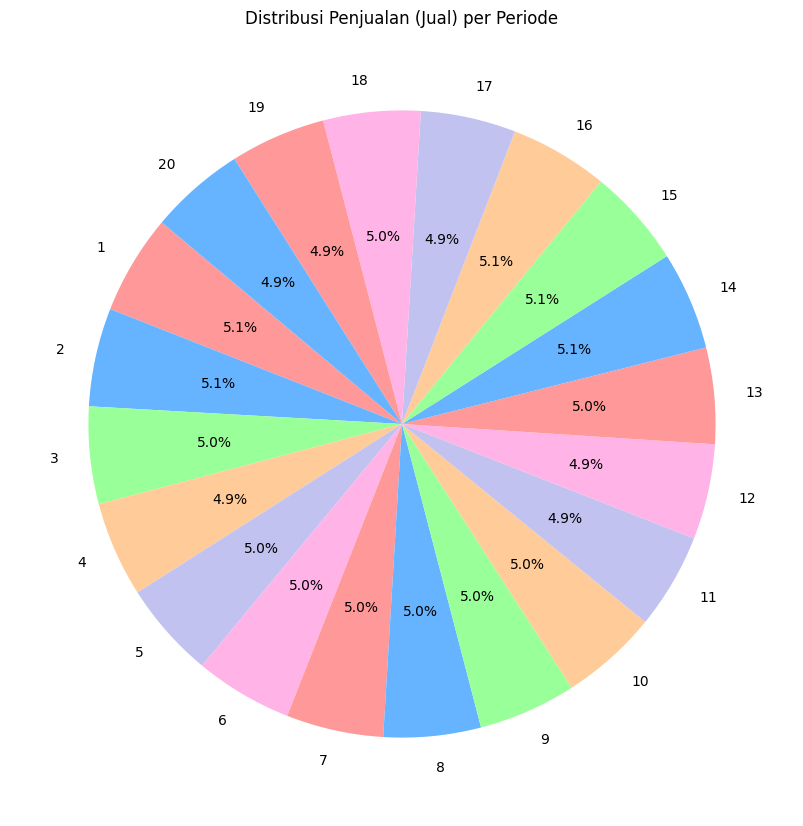

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari link
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url)
print(df.columns)

# Pie chart berdasarkan penjualan (Jual)
plt.figure(figsize=(8, 8))
plt.pie(
    df["Jual(Y)"], 
    labels=df["TIME"], 
    autopct='%1.1f%%', 
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
)

plt.title("Distribusi Penjualan (Jual) per Periode")
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data langsung dari GitHub
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")
print(df.head())
print(df.columns)

# Bersihkan nama kolom dari spasi
df.columns = df.columns.str.strip()
print("Kolom setelah dibersihkan:", df.columns)

# Ubah kolom Tanggal ke datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"], dayfirst=True)

# Hitung total omzet per hari per produk
omzet_per_hari = df.groupby(["Tanggal", "Jenis Produk"])["Harga"].sum().reset_index()

# Hitung jumlah order per hari per produk
order_per_hari = df.groupby(["Tanggal", "Jenis Produk"])["Harga"].count().reset_index()
order_per_hari.rename(columns={"Harga": "Order Count"}, inplace=True)

# Pivot biar lebih gampang untuk stacked chart
pivot_omzet = omzet_per_hari.pivot(index="Tanggal", columns="Jenis Produk", values="Harga").fillna(0)
pivot_order = order_per_hari.pivot(index="Tanggal", columns="Jenis Produk", values="Order Count").fillna(0)

# === Plot omzet stacked area chart ===
plt.figure(figsize=(12,6))
plt.stackplot(
    pivot_omzet.index, 
    pivot_omzet.values.T,   # pastikan array, bukan DataFrame
    labels=pivot_omzet.columns, 
    alpha=0.8
)
plt.title("Tren Omzet per Produk (Stacked Area)")
plt.ylabel("Total Omzet (Rp)")
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.legend(title="Jenis Produk", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === Plot jumlah order grouped bar chart ===
pivot_order.plot(kind="bar", figsize=(12,6))
plt.title("Tren Jumlah Order per Produk (Bar Chart)")
plt.ylabel("Jumlah Order")
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



   TIME  Promo(X1)  Karyawan(X2)  Jual(Y)
0     1        248            42     1705
1     2        210            35     1682
2     3        207            32     1663
3     4        153            33     1628
4     5        169            28     1650
Index(['TIME', 'Promo(X1)', 'Karyawan(X2)', 'Jual(Y)'], dtype='object')
Kolom setelah dibersihkan: Index(['TIME', 'Promo(X1)', 'Karyawan(X2)', 'Jual(Y)'], dtype='object')


KeyError: 'Tanggal'

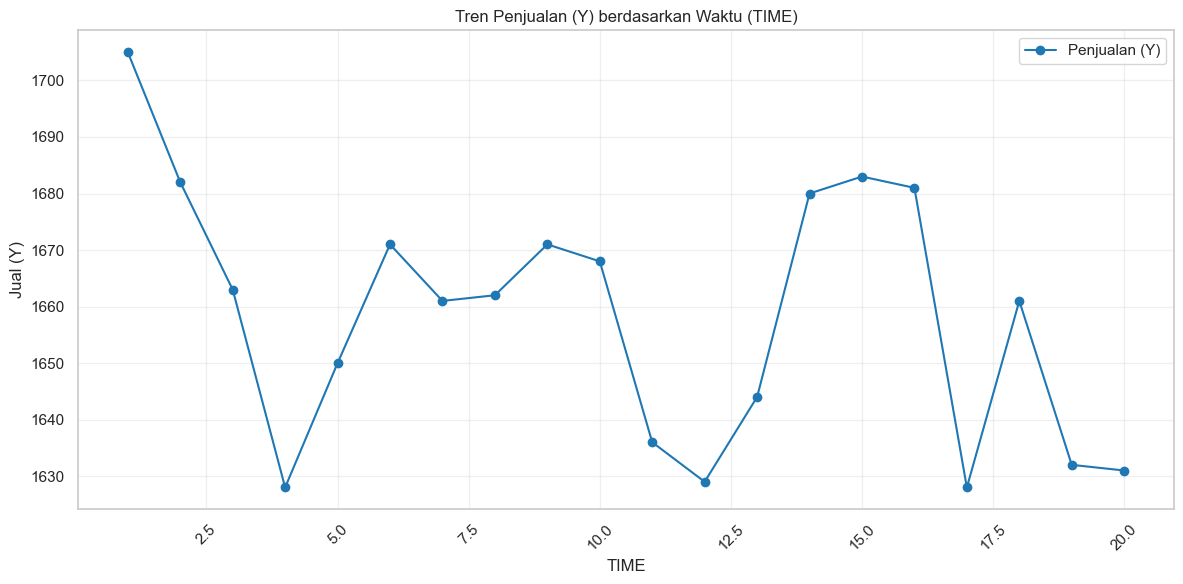

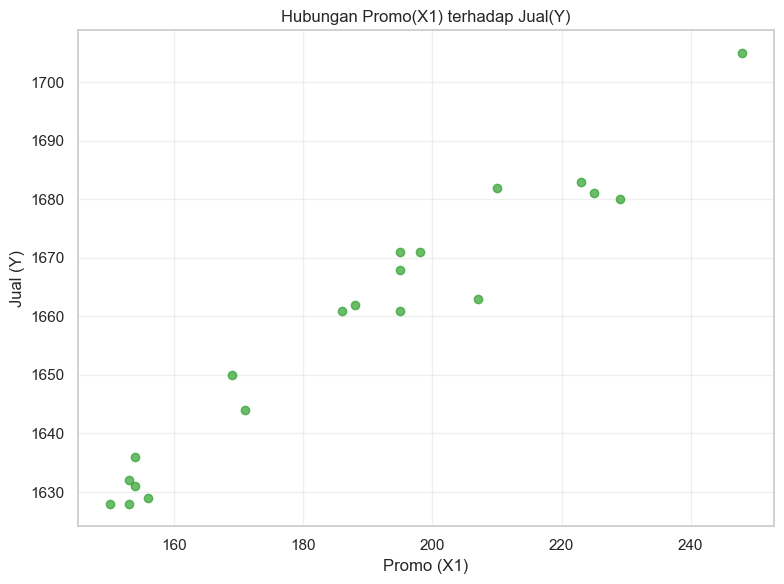

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")

# Bersihkan nama kolom
df.columns = df.columns.str.strip()

# === Line chart Jual(Y) berdasarkan TIME ===
plt.figure(figsize=(12,6))
plt.plot(df["TIME"], df["Jual(Y)"], marker="o", color="tab:blue", label="Penjualan (Y)")
plt.title("Tren Penjualan (Y) berdasarkan Waktu (TIME)")
plt.xlabel("TIME")
plt.ylabel("Jual (Y)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#Kode 2
plt.figure(figsize=(8,6))
plt.scatter(df["Promo(X1)"], df["Jual(Y)"], color="tab:green", alpha=0.7)
plt.title("Hubungan Promo(X1) terhadap Jual(Y)")
plt.xlabel("Promo (X1)")
plt.ylabel("Jual (Y)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Kode 3
plt.figure(figsize=(8,6))
plt.scatter(df["Karyawan(X2)"], df["Jual(Y)"], color="tab:red", alpha=0.7)
plt.title("Hubungan Karyawan(X2) terhadap Jual(Y)")
plt.xlabel("Karyawan (X2)")
plt.ylabel("Jual (Y)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Kode 4

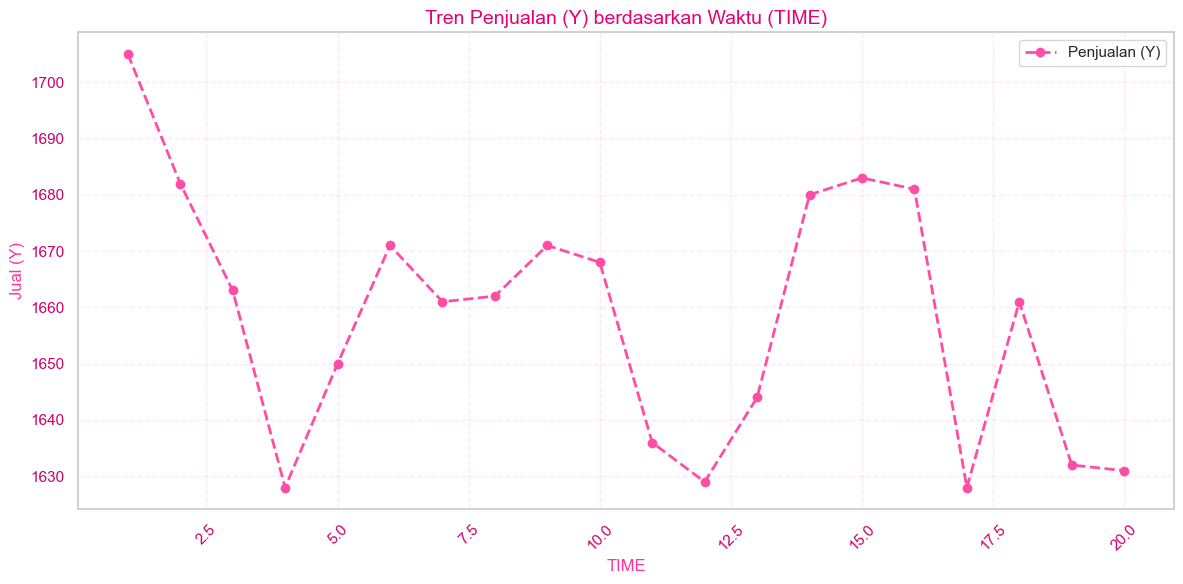

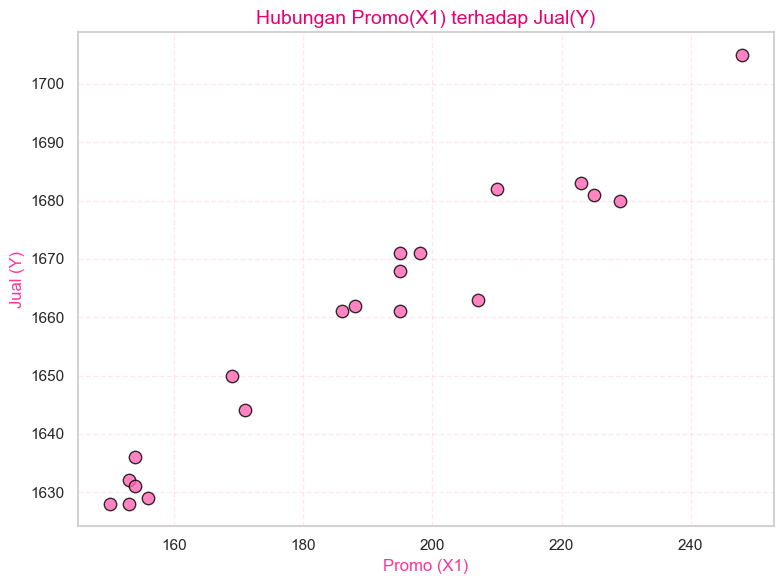

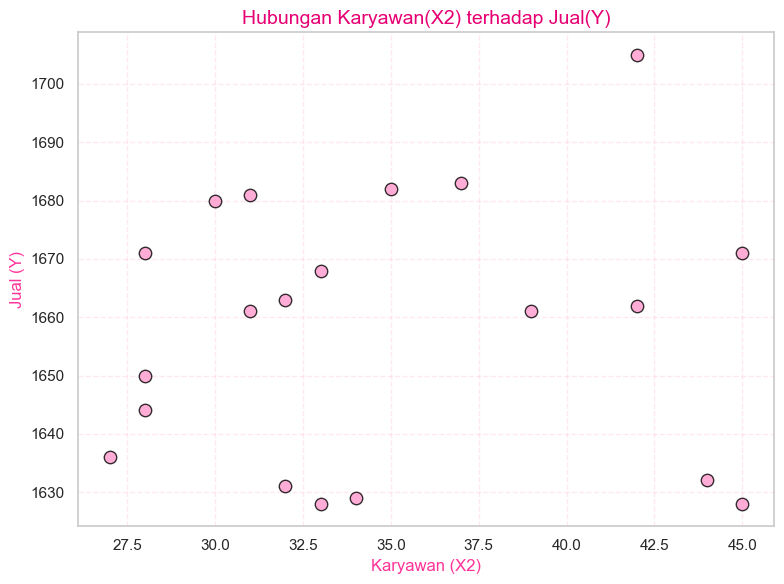

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")

# Bersihkan nama kolom
df.columns = df.columns.str.strip()

# === Line chart Jual(Y) berdasarkan TIME ===
plt.figure(figsize=(12,6))
plt.plot(
    df["TIME"], 
    df["Jual(Y)"], 
    marker="o", 
    color="#ff4da6",      # pink fuchsia
    linestyle="--", 
    linewidth=2, 
    label="Penjualan (Y)"
)
plt.title("Tren Penjualan (Y) berdasarkan Waktu (TIME)", fontsize=14, color="#e60073")
plt.xlabel("TIME", fontsize=12, color="#ff3399")
plt.ylabel("Jual (Y)", fontsize=12, color="#ff3399")
plt.xticks(rotation=45, color="#cc0066")
plt.yticks(color="#cc0066")
plt.grid(alpha=0.3, linestyle="--", color="#ffb3d9")
plt.legend()
plt.tight_layout()
plt.show()

# === Scatter Plot Promo vs Jual ===
plt.figure(figsize=(8,6))
plt.scatter(
    df["Promo(X1)"], 
    df["Jual(Y)"], 
    color="#ff66b2",    # pink lembut
    edgecolor="black", 
    alpha=0.8, 
    s=80
)
plt.title("Hubungan Promo(X1) terhadap Jual(Y)", fontsize=14, color="#e60073")
plt.xlabel("Promo (X1)", fontsize=12, color="#ff3399")
plt.ylabel("Jual (Y)", fontsize=12, color="#ff3399")
plt.grid(alpha=0.3, linestyle="--", color="#ffb3d9")
plt.tight_layout()
plt.show()

# === Scatter Plot Karyawan vs Jual ===
plt.figure(figsize=(8,6))
plt.scatter(
    df["Karyawan(X2)"], 
    df["Jual(Y)"], 
    color="#ff99cc",   # pink pastel
    edgecolor="black", 
    alpha=0.8, 
    s=80
)
plt.title("Hubungan Karyawan(X2) terhadap Jual(Y)", fontsize=14, color="#e60073")
plt.xlabel("Karyawan (X2)", fontsize=12, color="#ff3399")
plt.ylabel("Jual (Y)", fontsize=12, color="#ff3399")
plt.grid(alpha=0.3, linestyle="--", color="#ffb3d9")
plt.tight_layout()
plt.show()



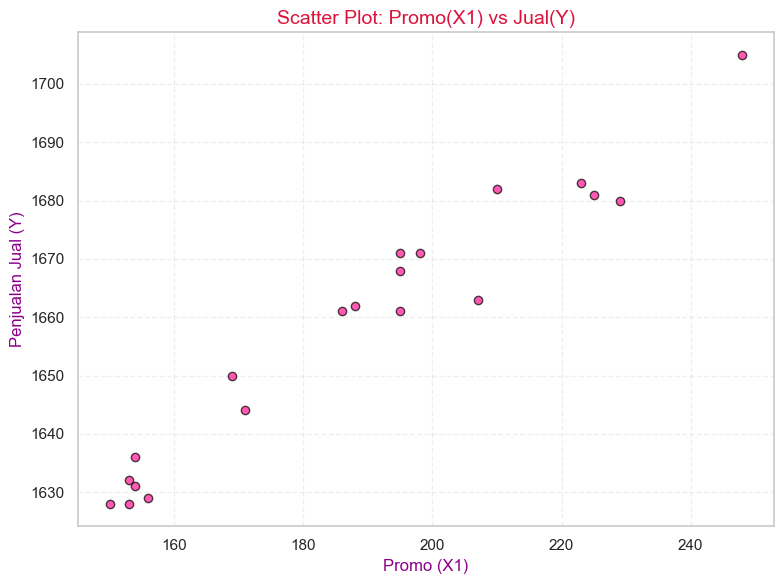

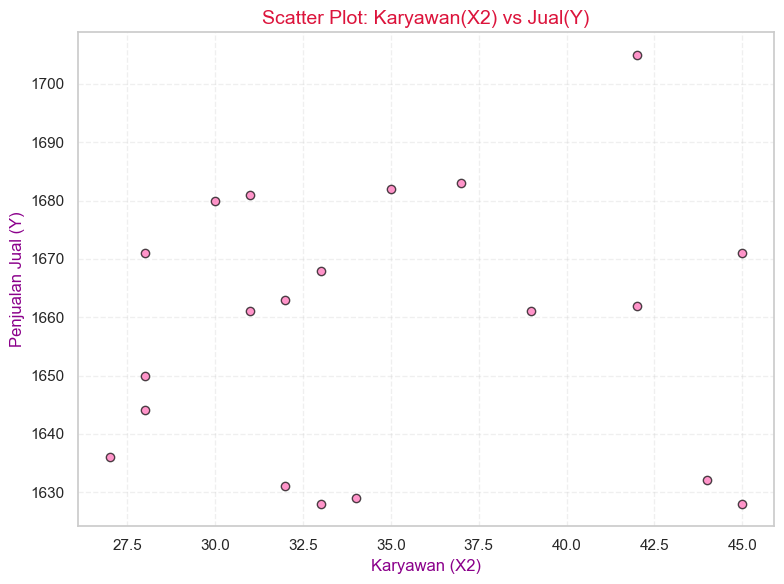

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")

# Bersihkan nama kolom
df.columns = df.columns.str.strip()

# === Scatter Plot: Promo(X1) vs Jual(Y) ===
fig, ax = plt.subplots(figsize=(8,6))  # create figure and axes
x = df["Promo(X1)"]
y = df["Jual(Y)"]

ax.scatter(x, y, color="deeppink", alpha=0.7, edgecolors="black")
ax.set_xlabel("Promo (X1)", fontsize=12, color="darkmagenta")
ax.set_ylabel("Penjualan Jual (Y)", fontsize=12, color="darkmagenta")
ax.set_title("Scatter Plot: Promo(X1) vs Jual(Y)", fontsize=14, color="crimson")
ax.grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# === Scatter Plot: Karyawan(X2) vs Jual(Y) ===
fig, ax = plt.subplots(figsize=(8,6))
x = df["Karyawan(X2)"]
y = df["Jual(Y)"]

ax.scatter(x, y, color="hotpink", alpha=0.7, edgecolors="black")
ax.set_xlabel("Karyawan (X2)", fontsize=12, color="darkmagenta")
ax.set_ylabel("Penjualan Jual (Y)", fontsize=12, color="darkmagenta")
ax.set_title("Scatter Plot: Karyawan(X2) vs Jual(Y)", fontsize=14, color="crimson")
ax.grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()


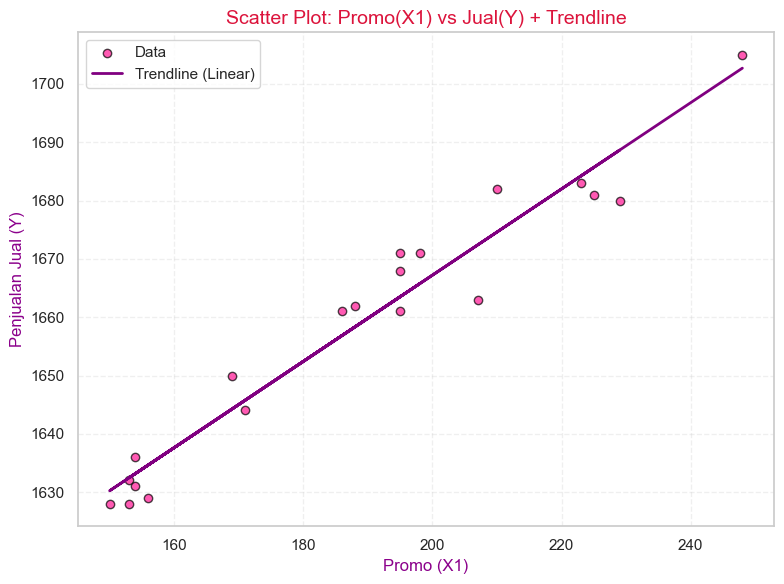

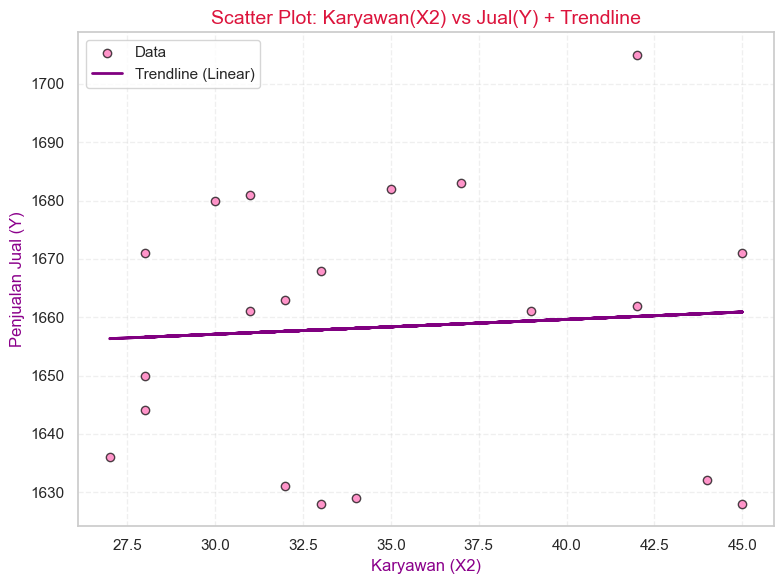

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")

# Bersihkan nama kolom
df.columns = df.columns.str.strip()

# === Scatter Plot: Promo(X1) vs Jual(Y) dengan Tren ===
fig, ax = plt.subplots(figsize=(8,6))
x = df["Promo(X1)"]
y = df["Jual(Y)"]

# Scatter
ax.scatter(x, y, color="deeppink", alpha=0.7, edgecolors="black", label="Data")

# Garis regresi linear
m, b = np.polyfit(x, y, 1)  # slope (m) dan intercept (b)
ax.plot(x, m*x + b, color="purple", linewidth=2, label="Trendline (Linear)")

ax.set_xlabel("Promo (X1)", fontsize=12, color="darkmagenta")
ax.set_ylabel("Penjualan Jual (Y)", fontsize=12, color="darkmagenta")
ax.set_title("Scatter Plot: Promo(X1) vs Jual(Y) + Trendline", fontsize=14, color="crimson")
ax.legend()
ax.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

# === Scatter Plot: Karyawan(X2) vs Jual(Y) dengan Tren ===
fig, ax = plt.subplots(figsize=(8,6))
x = df["Karyawan(X2)"]
y = df["Jual(Y)"]

# Scatter
ax.scatter(x, y, color="hotpink", alpha=0.7, edgecolors="black", label="Data")

# Garis regresi linear
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="purple", linewidth=2, label="Trendline (Linear)")

ax.set_xlabel("Karyawan (X2)", fontsize=12, color="darkmagenta")
ax.set_ylabel("Penjualan Jual (Y)", fontsize=12, color="darkmagenta")
ax.set_title("Scatter Plot: Karyawan(X2) vs Jual(Y) + Trendline", fontsize=14, color="crimson")
ax.legend()
ax.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

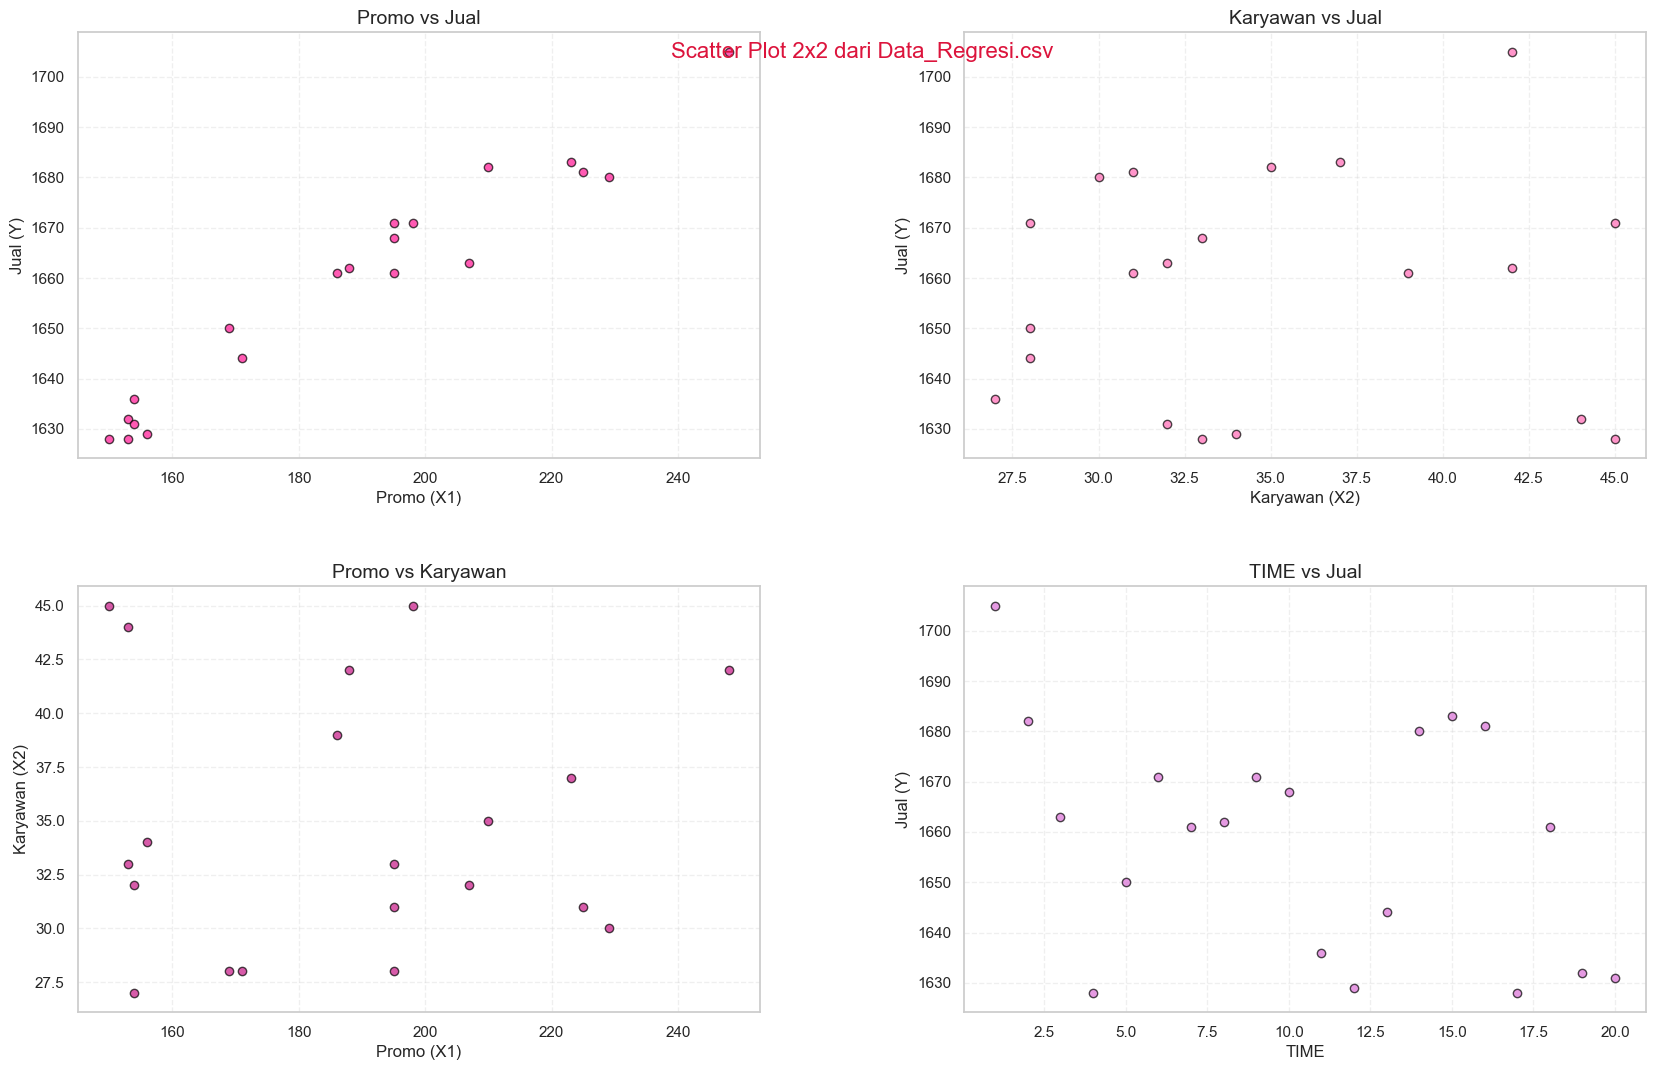

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")
df.columns = df.columns.str.strip()

# Definisi grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(16,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # spasi antar plot

# === Scatter 1: Promo vs Jual ===
x = df["Promo(X1)"]
y = df["Jual(Y)"]
axes[0,0].scatter(x, y, color="deeppink", alpha=0.7, edgecolors="black")
axes[0,0].set_xlabel("Promo (X1)", fontsize=12)
axes[0,0].set_ylabel("Jual (Y)", fontsize=12)
axes[0,0].set_title("Promo vs Jual", fontsize=14)
axes[0,0].grid(alpha=0.3, linestyle="--")

# === Scatter 2: Karyawan vs Jual ===
x = df["Karyawan(X2)"]
y = df["Jual(Y)"]
axes[0,1].scatter(x, y, color="hotpink", alpha=0.7, edgecolors="black")
axes[0,1].set_xlabel("Karyawan (X2)", fontsize=12)
axes[0,1].set_ylabel("Jual (Y)", fontsize=12)
axes[0,1].set_title("Karyawan vs Jual", fontsize=14)
axes[0,1].grid(alpha=0.3, linestyle="--")

# === Scatter 3: Promo vs Karyawan ===
x = df["Promo(X1)"]
y = df["Karyawan(X2)"]
axes[1,0].scatter(x, y, color="mediumvioletred", alpha=0.7, edgecolors="black")
axes[1,0].set_xlabel("Promo (X1)", fontsize=12)
axes[1,0].set_ylabel("Karyawan (X2)", fontsize=12)
axes[1,0].set_title("Promo vs Karyawan", fontsize=14)
axes[1,0].grid(alpha=0.3, linestyle="--")

# === Scatter 4: TIME vs Jual ===
x = df["TIME"]
y = df["Jual(Y)"]
axes[1,1].scatter(x, y, color="orchid", alpha=0.7, edgecolors="black")
axes[1,1].set_xlabel("TIME", fontsize=12)
axes[1,1].set_ylabel("Jual (Y)", fontsize=12)
axes[1,1].set_title("TIME vs Jual", fontsize=14)
axes[1,1].grid(alpha=0.3, linestyle="--")

plt.suptitle("Scatter Plot 2x2 dari Data_Regresi.csv", fontsize=16, color="crimson")
plt.show()


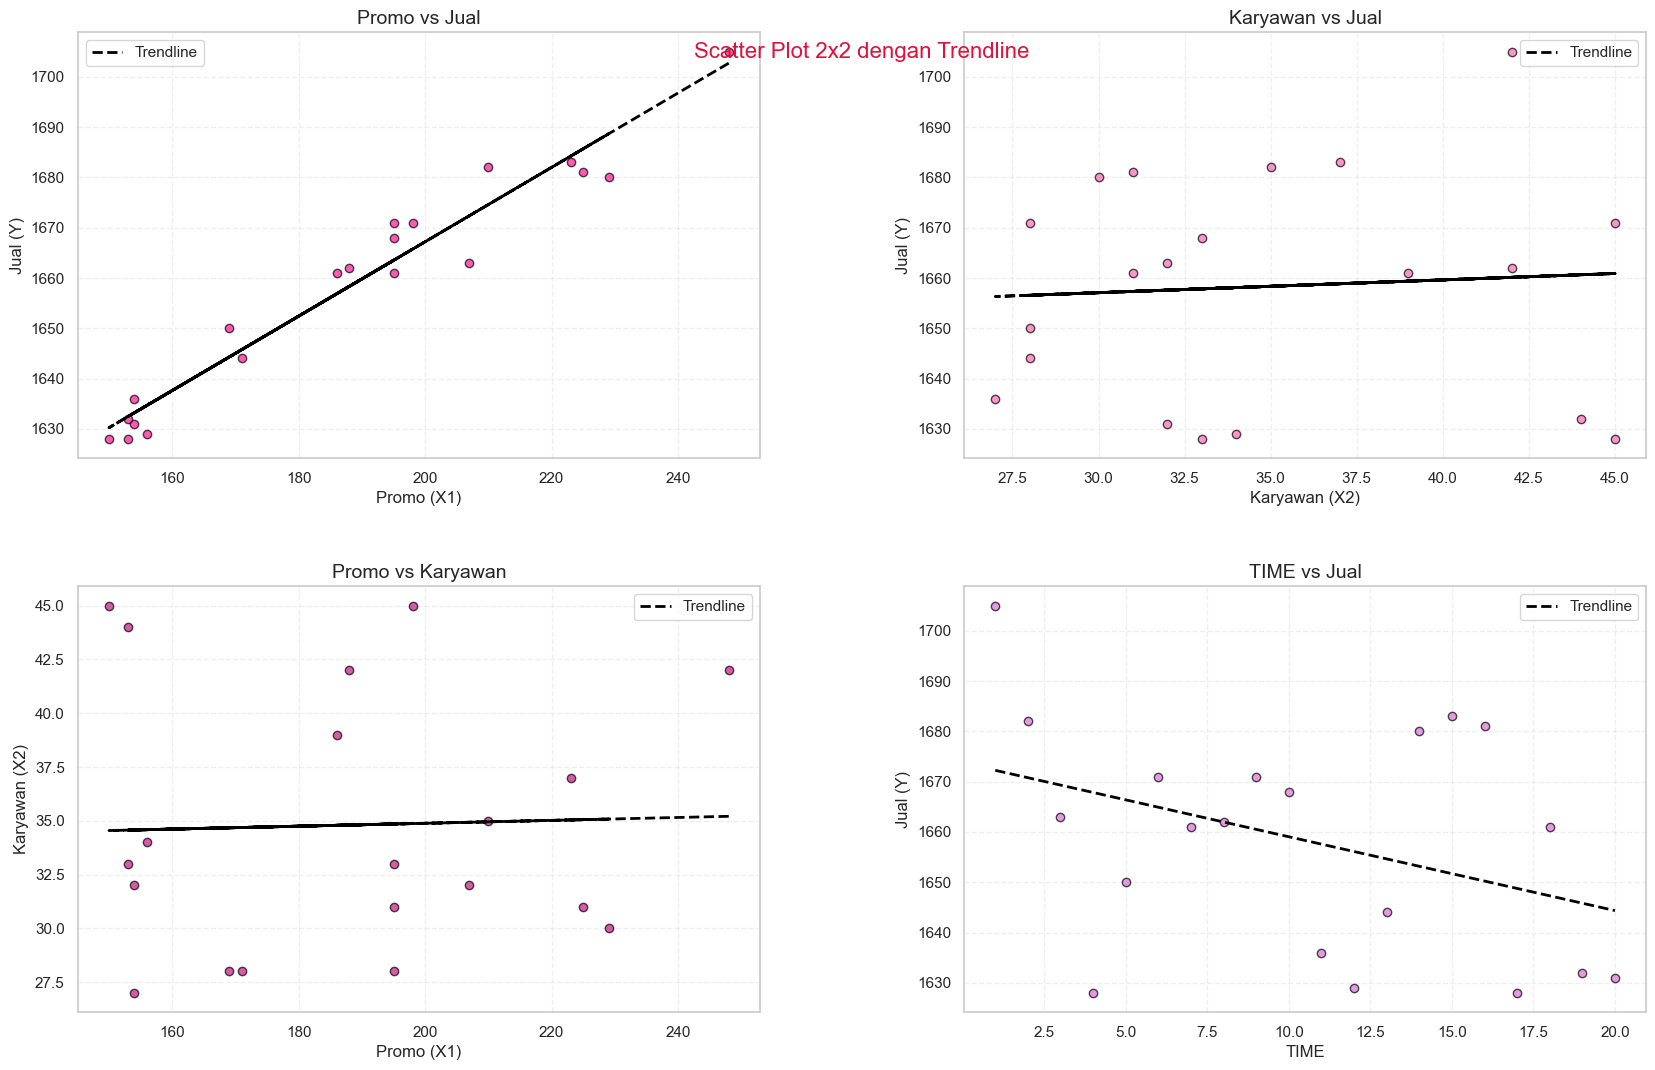

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")
df.columns = df.columns.str.strip()

# Definisi grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(16,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

def scatter_with_trend(ax, x, y, color, xlabel, ylabel, title):
    # Scatter
    ax.scatter(x, y, color=color, alpha=0.7, edgecolors="black")

    # Trend line (linear regression)
    z = np.polyfit(x, y, 1)        # koefisien slope dan intercept
    p = np.poly1d(z)
    ax.plot(x, p(x), color="black", linewidth=2, linestyle="--", label="Trendline")

    # Label dan style
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(alpha=0.3, linestyle="--")
    ax.legend()

# === Scatter 1: Promo vs Jual ===
scatter_with_trend(axes[0,0], df["Promo(X1)"], df["Jual(Y)"],
                   "deeppink", "Promo (X1)", "Jual (Y)", "Promo vs Jual")

# === Scatter 2: Karyawan vs Jual ===
scatter_with_trend(axes[0,1], df["Karyawan(X2)"], df["Jual(Y)"],
                   "hotpink", "Karyawan (X2)", "Jual (Y)", "Karyawan vs Jual")

# === Scatter 3: Promo vs Karyawan ===
scatter_with_trend(axes[1,0], df["Promo(X1)"], df["Karyawan(X2)"],
                   "mediumvioletred", "Promo (X1)", "Karyawan (X2)", "Promo vs Karyawan")

# === Scatter 4: TIME vs Jual ===
scatter_with_trend(axes[1,1], df["TIME"], df["Jual(Y)"],
                   "orchid", "TIME", "Jual (Y)", "TIME vs Jual")

plt.suptitle("Scatter Plot 2x2 dengan Trendline", fontsize=16, color="crimson")
plt.show()


# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #ffffffff; color: #b17eadff; padding: 12px; line-height: 0.7;">SEABORN </div></center>

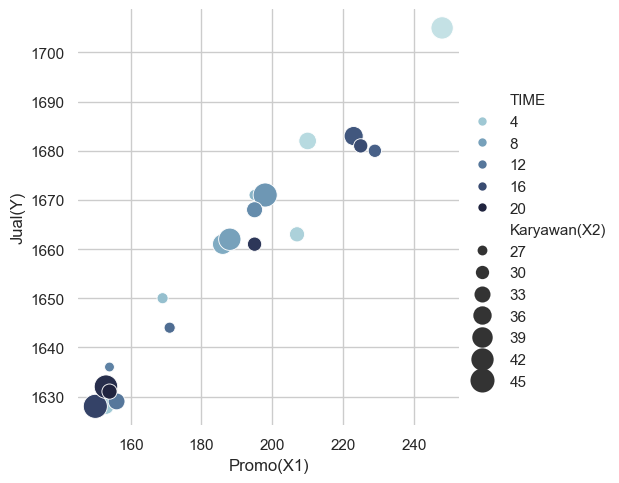

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Atur style seaborn
sns.set_theme(style="whitegrid")

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()  # buang spasi tambahan

# Buat scatter bubble plot
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="Promo(X1)", y="Jual(Y)",
    hue="TIME", size="Karyawan(X2)",
    palette=cmap, sizes=(50, 300),
)

# Atur sumbu dan grid
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.show()

# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #ffffffff; color: #b17eadff; padding: 12px; line-height: 0.7;">PLOTLY </div></center>

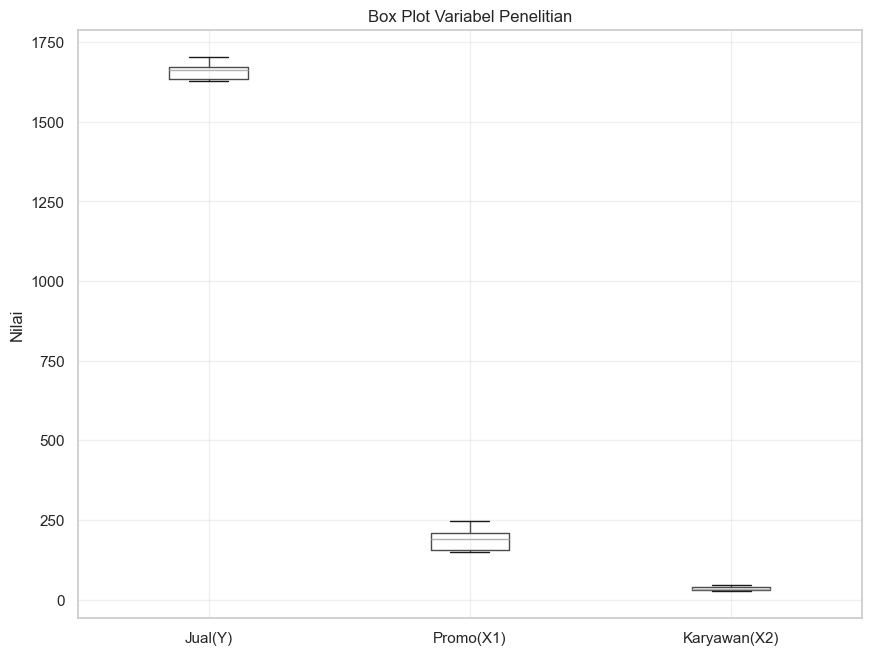

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")
df.columns = df.columns.str.strip()

# Buat box plot untuk ketiga variabel
plt.figure(figsize=(8,6))
df[["Jual(Y)", "Promo(X1)", "Karyawan(X2)"]].boxplot()
plt.title("Box Plot Variabel Penelitian")
plt.ylabel("Nilai")
plt.grid(alpha=0.3)
plt.show()


In [33]:
import pandas as pd
import plotly.express as px

# Baca data
url = "https://raw.githubusercontent.com/Alam-A99/Case-Study/refs/heads/main/Data_Regresi.csv"
df = pd.read_csv(url, delimiter=",")
df.columns = df.columns.str.strip()

# Box plot interaktif
fig = px.box(
    df, 
    y=["Jual(Y)", "Promo(X1)", "Karyawan(X2)"], 
    title="Box Plot Variabel Penelitian (Interaktif)", 
    color_discrete_sequence=["pink"]
)

fig.show()
